In [1]:
%load_ext autoreload
%autoreload 2

## This is a tutorial on `histogram` mode scenario of `Plot` class.

In [2]:
# Necessary imports
import sys
import numpy as np
from skimage.io import imread
from skimage.exposure import equalize_hist

sys.path.insert(0, '../..')
from glyf import plot

In [3]:
# Load sample data
original_image = imread('data/image.png') / 255
equalized_image = equalize_hist(original_image, mask=original_image < 0.99)

This is the usual way to display several images.

To make make histogram plot of them, simply specify the mode of the same name.

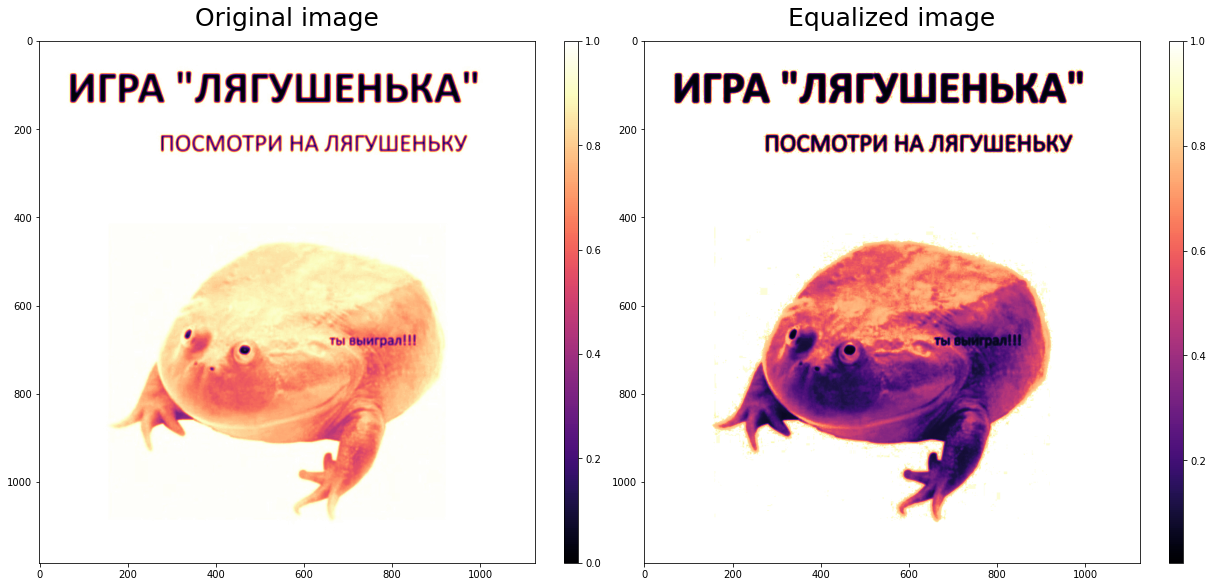

In [4]:
plot(
    data=[original_image, equalized_image],
    cmap='batchflow',
    combine='separate',
    colorbar=True,
    title=['Original image', 'Equalized image'],
)

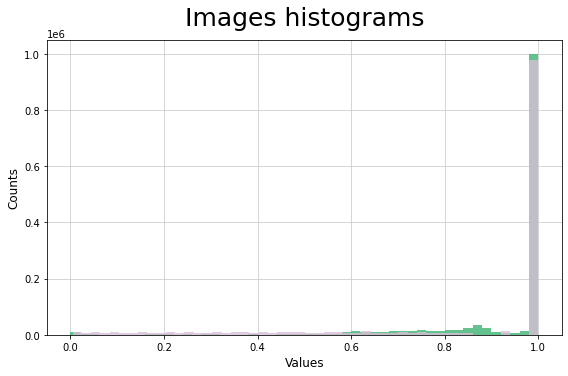

In [5]:
plot(
    data=[original_image, equalized_image],
    mode='histogram', # new parameter
    title='Images histograms' # parameter changed
)

We have obvious outlier in our data, so it might be a good idea to log histogram bins values in order to make plots more informative.

Parameter `log` is your best buddy here.

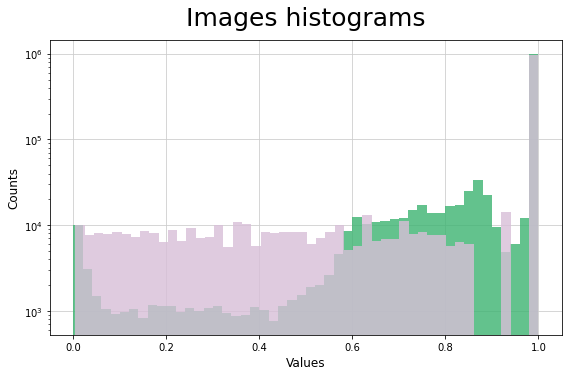

In [6]:
plot(
    data=[original_image, equalized_image],
    mode='histogram',
    title='Images histograms',
    log=True, # new parameter
)

Specify legend labels via `label` parameter.

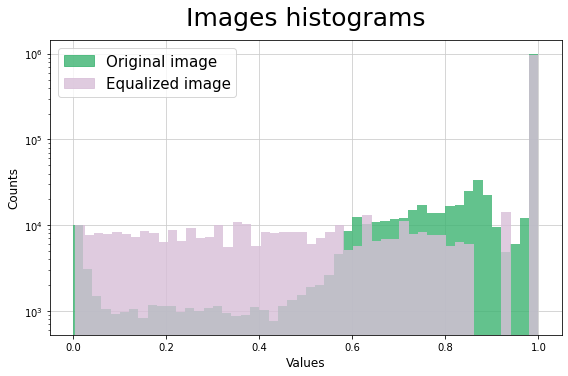

In [7]:
plot(
    data=[original_image, equalized_image],
    mode='histogram',
    title='Images histograms',
    log=True,
    label=['Original image', 'Equalized image'] # new parameter
)

Parameter `bins`, `color` and `alpha` are hard-coded and automatically parsed from provided keyword arguments.

However, `plt.hist` except much more parameters, and naturally, one might have an intention to use them.

To do so, add prefix `'histogram_'` to a parameter name, so that the plotter knows, where to redirect this parameter to.

Example below shows, how to specify `histype` parameter in such a way.

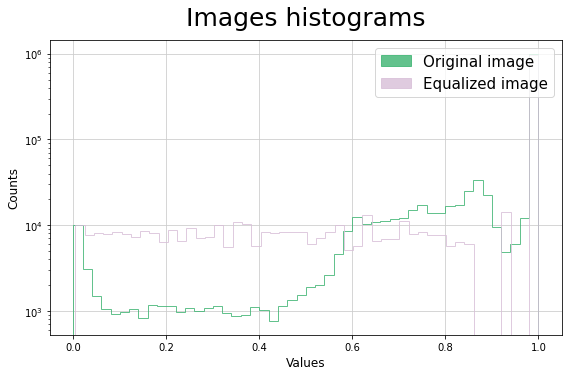

In [8]:
plot(
    data=[original_image, equalized_image],
    mode='histogram',
    title='Images histograms',
    log=True,
    label=['Original image', 'Equalized image'],
    histogram_histtype='step' # new parameter
)

To display histograms separately use `combine='separate'`.

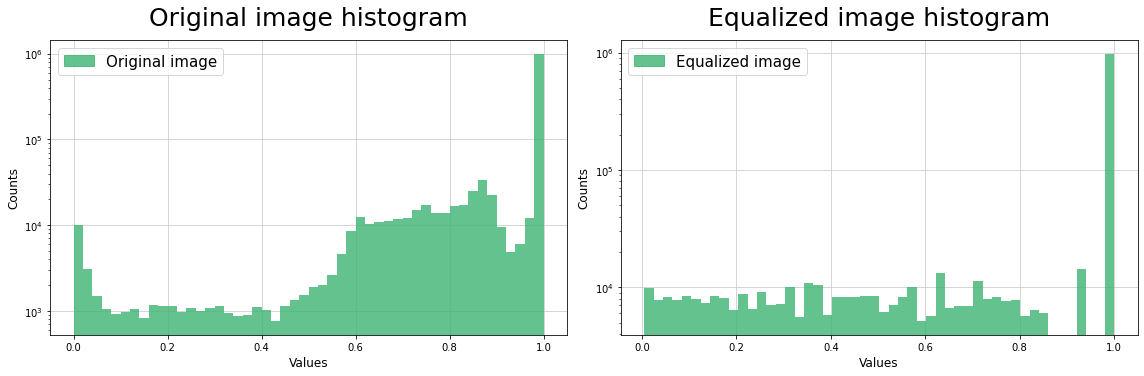

In [9]:
plot(
    data=[original_image, equalized_image],
    mode='histogram',
    title=['Original image histogram', 'Equalized image histogram'], # parameter changed
    log=True,
    label=['Original image', 'Equalized image'],
    combine='separate' # new parameter
)

You might notice, that the color is the same on both subplots below.

That happens, because separate subplots have separate default colors generators. To use different colors, provide them explicitly.

Also maximum bin value differs between subplots, which might be undesirable for histograms visual comparison. To use same y-axis user `sharey`.

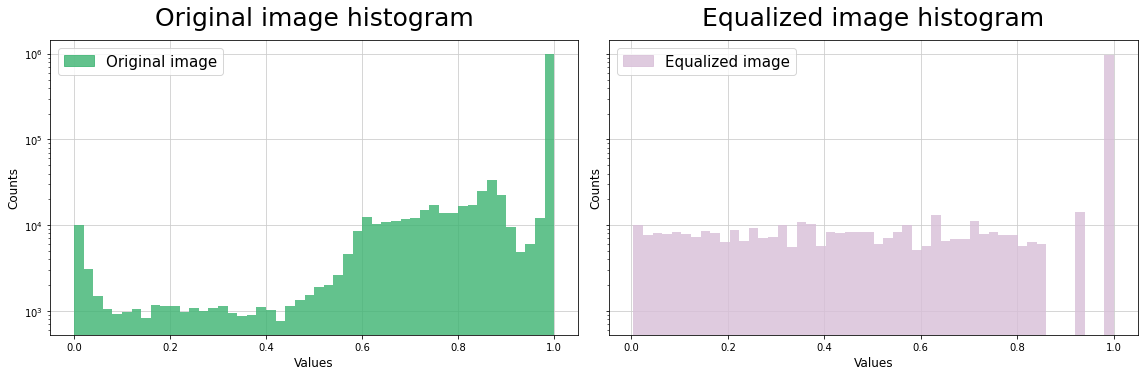

In [10]:
plot(
    data=[original_image, equalized_image],
    mode='histogram',
    title=['Original image histogram', 'Equalized image histogram'],
    log=True,
    label=['Original image', 'Equalized image'],
    combine='separate',
    color=['mediumseagreen', 'thistle'], # new parameter
    sharey=True # new parameter
)

To display histograms in 'mixed' manner, i.e. with some histograms overlaid and some displayed separately, use nested lists of histograms arrays.

If list has level 2 nestedness, outer level defines subplots order while inner one defines layers order.

Note, that parameters should have same nestedness level.

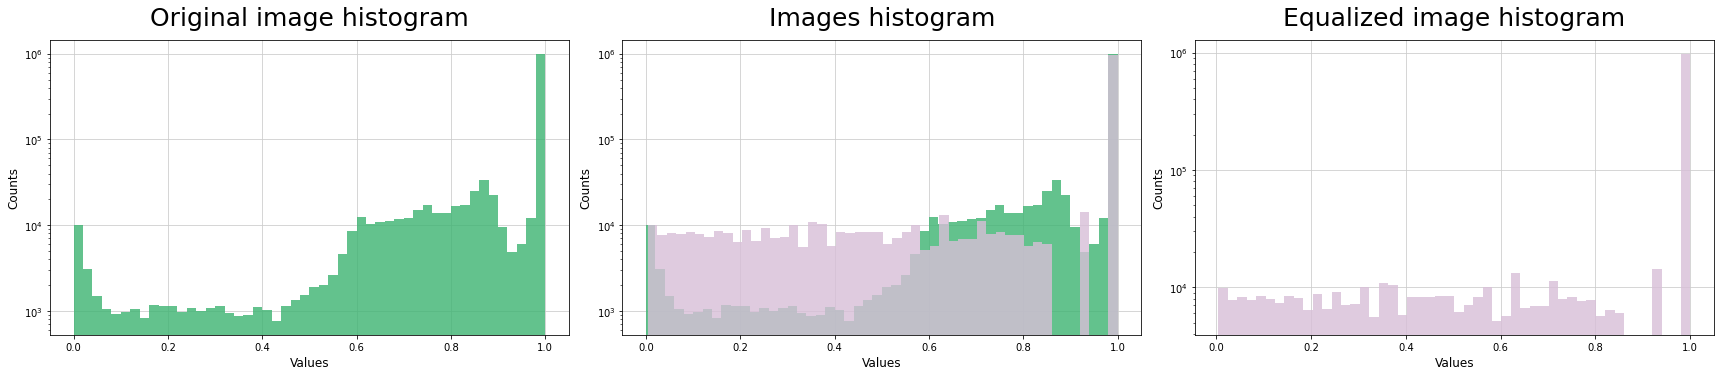

In [11]:
plot(
    data=[original_image, [original_image, equalized_image], equalized_image], # parameter changed
    mode='histogram',
    title=['Original image histogram', 'Images histogram', 'Equalized image histogram'], # parameter changed
    log=True,
    color=['mediumseagreen', ['mediumseagreen', 'thistle'], 'thistle'], # parameter changed
)

To create plots with mixed-type visualizations one can use `positions` keyword combined with explicitly provided `ncols`, `nrows`.
Parameter `positions` specifies subplots indices to put data on.

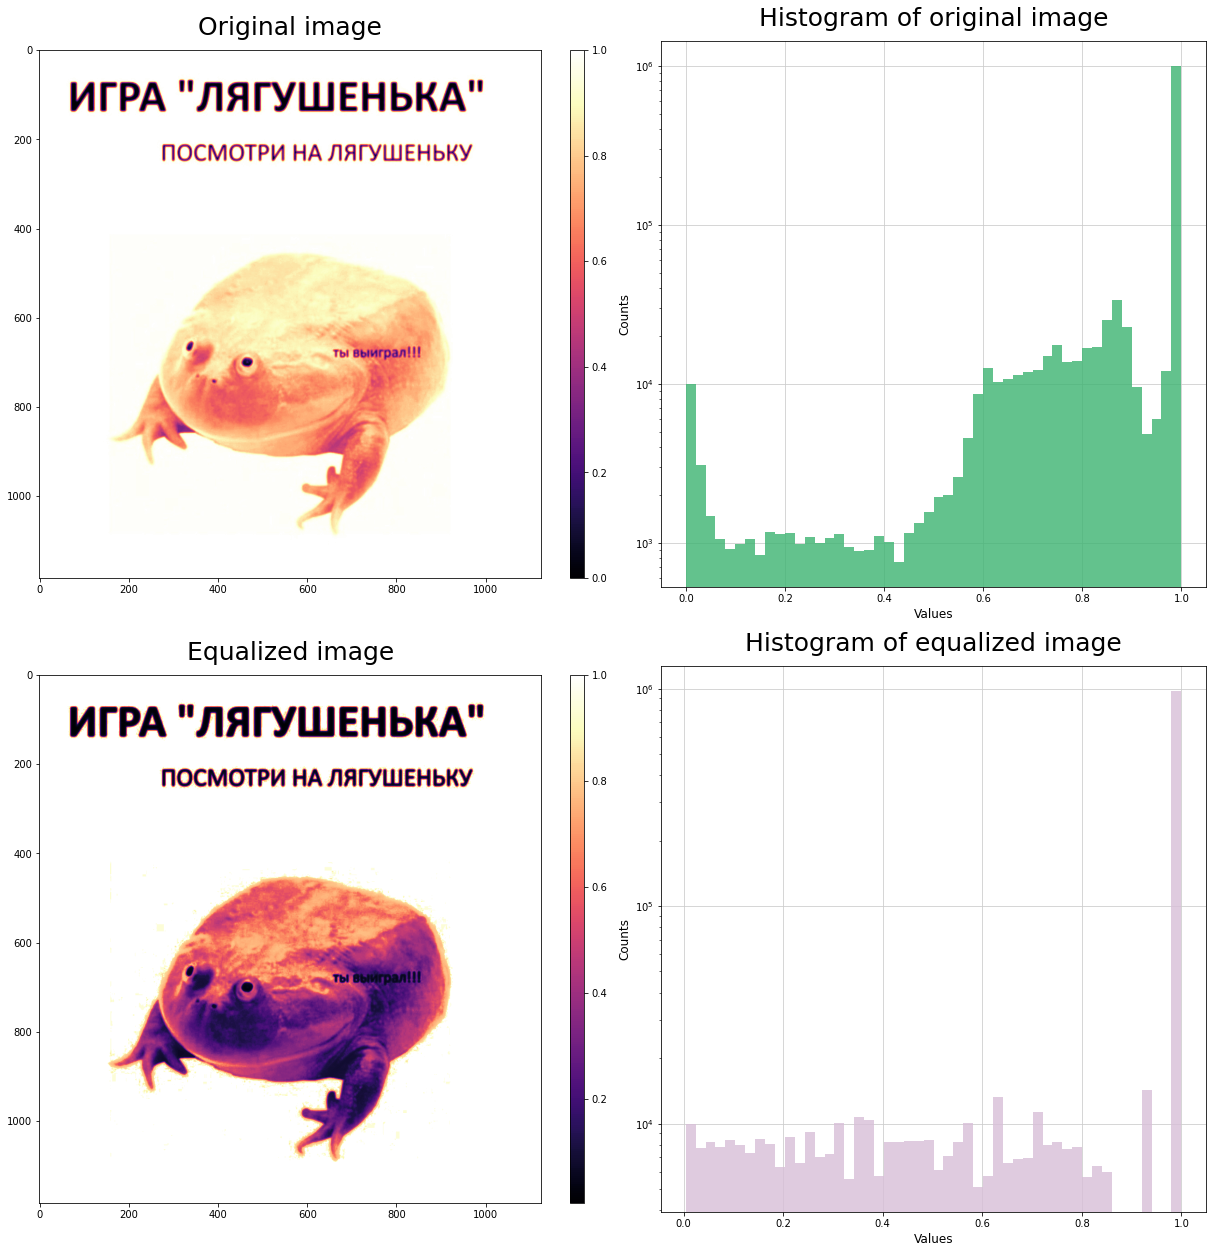

In [12]:
plotter = plot(
    data=[original_image, equalized_image],
    positions=[0, 2],
    ncols=2,
    nrows=2,
    mode='image',
    cmap='batchflow',
    combine='separate',
    colorbar=True,
    title=['Original image', 'Equalized image'],
)

plotter.plot(
    data=[original_image, equalized_image],
    positions=[1, 3],
    mode='histogram',
    combine='separate',
    title=['Histogram of original image', 'Histogram of equalized image'],
    log=True,
    color=['mediumseagreen', 'thistle']
)